INSTALL, IMPORT MODULES AND LOAD DATA

In [1]:
# Install seaborn, plotly

%pip install seaborn
%pip install plotly

In [2]:
# Import modules

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
import re

In [3]:
# Load data set 20
df_20 = pd.read_csv('players_20.csv')


QUICK REVIEW DATA SET

In [4]:
# Quick look info top rows

df_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
# Review data info

df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 11.5+ MB


In [6]:
# Review basic statistic

df_20.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [7]:
# Review total cell value 

df_20.size

1900912

In [8]:
# Review dataframe shape

df_20.shape

(18278, 104)

In [9]:
# List column label

cols_20 = list(df_20.columns)
print(cols_20)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [10]:
# Check duplicates

df_20_drop_duplicates = df_20.drop_duplicates()
df_20_drop_duplicates.size

1900912

DROP UNNECESSARY COLUMNS

In [11]:
# Create drop list

drop_list = ['dob','sofifa_id','player_url','long_name','body_type','real_face','loaned_from','nation_position','nation_jersey_number']

In [12]:
# Apply drop list

df_20 = df_20.drop(drop_list,axis = 1)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [13]:
# Review new dataframe

df_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


CALCULATE BODY MAX INDEX (BMI) FOR EACH PLAYER

In [14]:
# Add new column BMI with fomular: BMI = (weight(kg) / height(m)) ^2

df_20['BMI'] = df_20['weight_kg'] / (df_20['height_cm']/100) **2

In [15]:
# Review new dataframe

df_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,24.913495
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,23.735308
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,22.204082
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.615211
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,24.163265


PLAYER POSITION

In [16]:
# Review position value

df_20[['short_name','player_positions']].head()

,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"


In [17]:
# Create new dataframe for player position

new_player_positions = df_20['player_positions'].str.get_dummies(sep = ',')
new_player_positions.columns

Index([' CAM', ' CB', ' CDM', ' CF', ' CM', ' LB', ' LM', ' LW', ' LWB', ' RB',
       ' RM', ' RW', ' RWB', ' ST', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB',
       'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST'],
      dtype='object')

In [18]:
# Merge new dataframe

df_20 = pd.concat([df_20,new_player_positions], axis =1)
df_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,0,0,0,0,0,0,0,1,0,0
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,0,0,0,0,0,0,0,0,0,1
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,0,0,0,1,0,0,0,0,0,0
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,1,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,0,0,0,1,0,0,0,0,0,0


CLEAN POSITION RATING

In [19]:
# List columns

rating = ['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [20]:
# Review list columns

df_20[rating].head()


,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [21]:
# Create funtion to clean data

def clean_position(x):
    x = x.str.split('+').str[0]
    return x

In [22]:
# Apply funtion to dataframe

df_20[rating] = df_20[rating].apply(clean_position,axis = 1)
df_20[rating].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61


In [23]:
# Count null

df_20[rating].isnull().sum()

ls     2036
st     2036
rs     2036
lw     2036
lf     2036
cf     2036
rf     2036
rw     2036
lam    2036
cam    2036
ram    2036
lm     2036
lcm    2036
cm     2036
rcm    2036
rm     2036
lwb    2036
ldm    2036
cdm    2036
rdm    2036
rwb    2036
lb     2036
lcb    2036
cb     2036
rcb    2036
rb     2036
dtype: int64

In [24]:
# Fill in 0 for NaN value

df_20[rating] = df_20[rating].fillna(0)
df_20[rating].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61


In [25]:
# Convert value to int

df_20[rating] = df_20[rating].astype(int)
df_20[rating].dtypes

ls     int32
st     int32
rs     int32
lw     int32
lf     int32
cf     int32
rf     int32
rw     int32
lam    int32
cam    int32
ram    int32
lm     int32
lcm    int32
cm     int32
rcm    int32
rm     int32
lwb    int32
ldm    int32
cdm    int32
rdm    int32
rwb    int32
lb     int32
lcb    int32
cb     int32
rcb    int32
rb     int32
dtype: object

FILL MISSING SKILL VALUES

Let's fill missing value in 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic' with mean value

In [26]:
# Review column

skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df_20[skills].head()

,pace,shooting,passing,dribbling,defending,physic
0,87.0,92.0,92.0,96.0,39.0,66.0
1,90.0,93.0,82.0,89.0,35.0,78.0
2,91.0,85.0,87.0,95.0,32.0,58.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,83.0,86.0,94.0,35.0,66.0


In [27]:
# Calculate total null value

df_20[skills].isna().sum()

pace         2036
shooting     2036
passing      2036
dribbling    2036
defending    2036
physic       2036
dtype: int64

In [28]:
# Convert value to int

df_20[skills] = df_20[skills].astype(float,errors = 'ignore')
df_20[skills].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pace       16242 non-null  float64
 1   shooting   16242 non-null  float64
 2   passing    16242 non-null  float64
 3   dribbling  16242 non-null  float64
 4   defending  16242 non-null  float64
 5   physic     16242 non-null  float64
dtypes: float64(6)
memory usage: 856.9 KB


In [29]:
# Fill null value with mean value of the column

df_20[skills] = df_20[skills].fillna(df_20[skills].mean())
df_20[skills].head()

,pace,shooting,passing,dribbling,defending,physic
0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000
1,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000
2,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000
3,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678
4,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000


In [30]:
# Calculate total null value again to check

df_20[skills].isna().sum()

pace         0
shooting     0
passing      0
dribbling    0
defending    0
physic       0
dtype: int64

FILL ALL OTHER DATA WITH ZERO

In [31]:
# Fill all Nan in dataframe with 0

df_20 = df_20.fillna(0)
df_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,0,0,0,0,0,0,0,1,0,0
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,0,0,0,0,0,0,0,0,0,1
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,0,0,0,1,0,0,0,0,0,0
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,1,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,0,0,0,1,0,0,0,0,0,0


In [32]:
# Review total NaN to check

df_20.isna().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
RB            0
RM            0
RW            0
RWB           0
ST            0
Length: 134, dtype: int64

VISUALIZATION DATA

1. Scatter Plot (by Age in 2020) - Over Rating vs Value in EU

<function matplotlib.pyplot.show(close=None, block=None)>

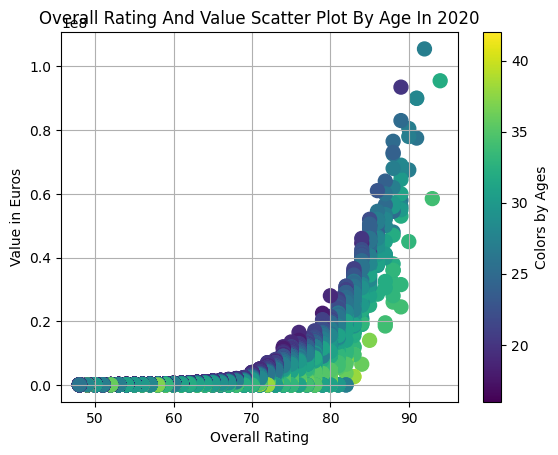

In [33]:
# Create Scatter:

colors = np.array(df_20['age'])

plt.scatter(data = df_20,
            x = 'overall',
            y = 'value_eur',
            c = colors,
            cmap = 'viridis',
           s= 100)


plt.colorbar(label = 'Colors by Ages')
plt.grid(True)
plt.title('Overall Rating And Value Scatter Plot By Age In 2020')
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show

2. Pie Chart Proportion of Right/Left Foot Player

In [34]:
# Create Table Calculate Preffered_foot

counts = df_20['preferred_foot'].value_counts()
counts

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

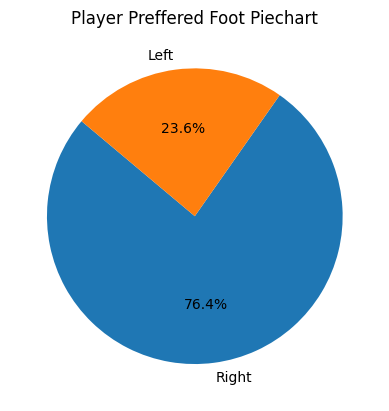

In [35]:
# Create Pie chart

plt.pie(counts,
        labels = counts.index,
       autopct = '%1.1f%%',
       startangle = 140)
plt.title('Player Preffered Foot Piechart')
plt.show

3. Player Age Histogram
Show numbers of players by ages

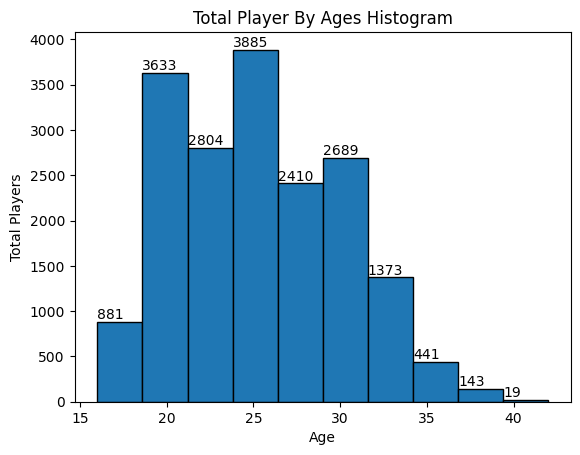

In [36]:
age,bin, count = plt.hist(df_20['age'],
                        bins = 10,
                        edgecolor = 'k')
plt.xlabel('Age')
plt.ylabel('Total Players')
plt.title('Total Player By Ages Histogram')
for i in range(len(count)):
    plt.text(bin[i],age[i],str(int(age[i])), ha = 'left',va = 'bottom')
plt.show()

4. Piechart Desscribe Percentage of Player In Attack Positions
Attact Position inluding RW, LW, ST, CF, LS, RS, RF, LF

In [37]:
# List Attack Positions

attack = [' CF',' LW', ' RW', ' ST', 'CF', 'LW', 'RW', 'ST']

df_20[attack].head()

,CF,LW,RW,ST,CF,LW,RW,ST
0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0


In [38]:
# Total Player Each Position

attack_count = df_20[attack].sum()

<function matplotlib.pyplot.show(close=None, block=None)>

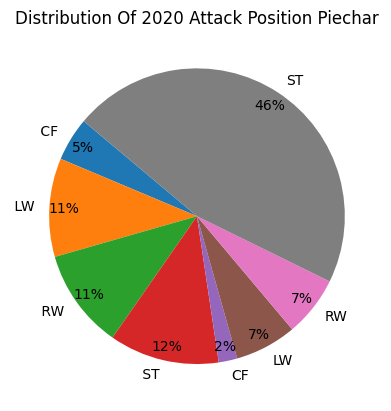

In [39]:
# Create Piechart

plt.pie(attack_count,
        labels = attack_count.index,
        autopct = '%1.0f%%',
        pctdistance = 0.9,
        startangle = 140)
plt.title('Distribution Of 2020 Attack Position Piechar')
plt.show
    

5. Piechart Desscribe Percentage of Player In Midfield Positions

In [40]:
# List Midfield Positions
mid = [' CAM', ' CDM', ' CM', ' LM',' RM', 'CAM', 'CDM', 'CM','LM', 'RM']

df_20[mid].head()

,CAM,CDM,CM,LM,RM,CAM,CDM,CM,LM,RM
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [41]:
# Total Player Each Position

mid_count = df_20[mid].sum()

<function matplotlib.pyplot.show(close=None, block=None)>

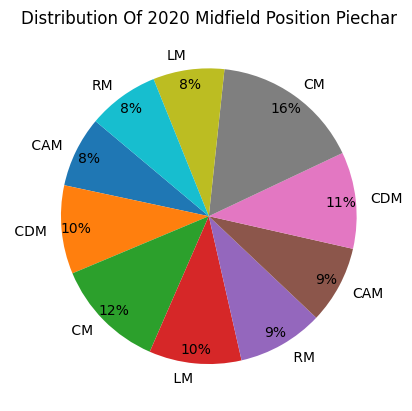

In [42]:
# Create Piechart

plt.pie(mid_count,
        labels = mid_count.index,
        autopct = '%1.0f%%',
        pctdistance = 0.9,
        startangle = 140)
plt.title('Distribution Of 2020 Midfield Position Piechar')
plt.show

6. Piechart Desscribe Percentage of Player In Defense Positions

In [43]:
# List Defense Positions

defense = [' CB', ' LB', ' LWB', ' RB', ' RWB', 'CB', 'GK', 'LB',  'LWB', 'RB', 'RWB']
df_20[defense].head()

,CB,LB,LWB,RB,RWB,CB,GK,LB,LWB,RB,RWB
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# Total Player Each Position

defense_count = df_20[defense].sum()

<function matplotlib.pyplot.show(close=None, block=None)>

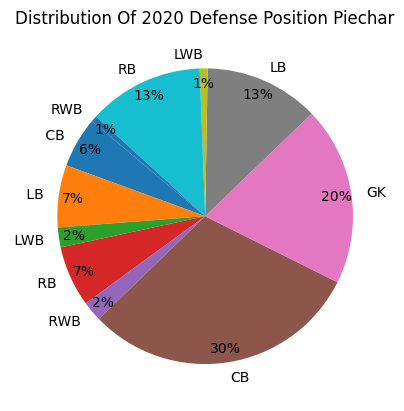

In [45]:
# Create Piechart

plt.pie(defense_count,
        labels = defense_count.index,
        autopct = '%1.0f%%',
        pctdistance = 0.9,
        startangle = 140)
plt.title('Distribution Of 2020 Defense Position Piechar')
plt.show

7. Show Top 10 Players By Value

In [46]:
# List attributes:

attributes = ['short_name','age','overall','value_eur']


In [49]:
# Sort value follow attributes list


df_top10 = df_20[attributes].sort_values('value_eur',ascending = False).head(10).reset_index()
df_top10.head()

,index,short_name,age,overall,value_eur
0,2,Neymar Jr,27,92,105500000
1,0,L. Messi,32,94,95500000
2,10,K. Mbappé,20,89,93500000
3,5,K. De Bruyne,28,91,90000000
4,4,E. Hazard,28,91,90000000


<function matplotlib.pyplot.show(close=None, block=None)>

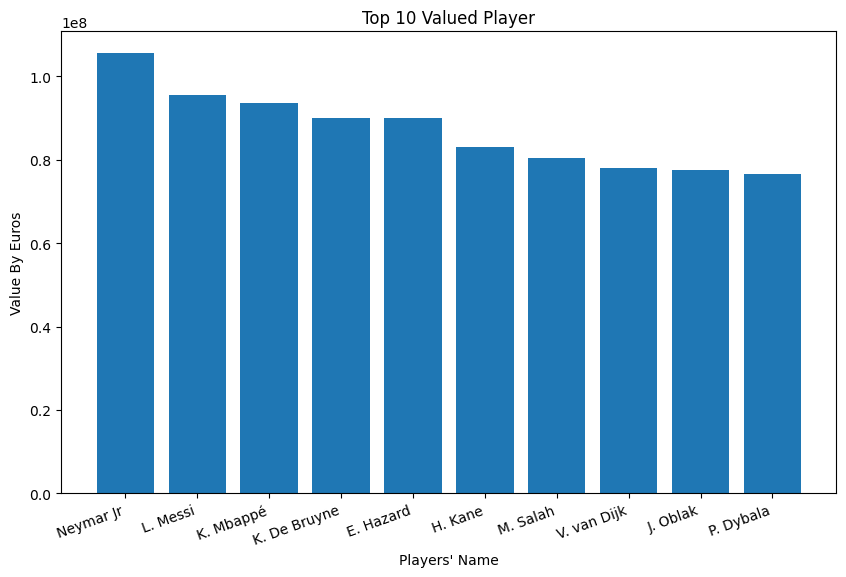

In [53]:
# Create bar chart

plt.figure(figsize = (10,6))
plt.bar(data = df_top10,
        x = 'short_name',
        height = 'value_eur')
plt.title('Top 10 Valued Player')
plt.xlabel("Players' Name")
plt.ylabel('Value By Euros')
plt.xticks(rotation = 20, horizontalalignment = 'right')
plt.show
